<a href="https://colab.research.google.com/github/HesamoddinHosseini/Pretrain_ResNet50/blob/main/Pretrain_ResNet50_q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://tensorlayer.readthedocs.io/en/latest/modules/prepro.html
# https://keras.io/api/models/model_saving_apis/
# http://ai.bu.edu/M3SDA/

import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as layers


In [ ]:
log_dir = "logs/"
BATCH_SIZE = 32
BUFFER_SIZE = 1000
images_shape = [224, 224, 3]
images_size = (224, 224)
input_size = (224, 224, 3)
embedding_size = 64
class_count = 10
EPOCHS = 5

In [ ]:
!wget http://csr.bu.edu/ftp/visda/2019/multi-source/real.zip


--2022-04-24 14:53:58--  http://csr.bu.edu/ftp/visda/2019/multi-source/real.zip
Resolving csr.bu.edu (csr.bu.edu)... 128.197.11.70
Connecting to csr.bu.edu (csr.bu.edu)|128.197.11.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6062039589 (5.6G) [application/zip]
Saving to: ‘real.zip’

real.zip            100%[===================>]   5.65G  39.2MB/s    in 2m 7s   

2022-04-24 14:56:05 (45.4 MB/s) - ‘real.zip’ saved [6062039589/6062039589]



In [ ]:
!unzip real.zip

Streaming output truncated to the last 5000 lines.
  inflating: real/waterslide/real_336_000199.jpg  
  inflating: real/waterslide/real_336_000200.jpg  
  inflating: real/waterslide/real_336_000201.jpg  
  inflating: real/waterslide/real_336_000202.jpg  
  inflating: real/waterslide/real_336_000203.jpg  
  inflating: real/waterslide/real_336_000204.jpg  
  inflating: real/waterslide/real_336_000205.jpg  
  inflating: real/waterslide/real_336_000206.jpg  
  inflating: real/waterslide/real_336_000207.jpg  
  inflating: real/waterslide/real_336_000208.jpg  
  inflating: real/waterslide/real_336_000209.jpg  
  inflating: real/waterslide/real_336_000210.jpg  
  inflating: real/waterslide/real_336_000211.jpg  
  inflating: real/waterslide/real_336_000212.jpg  
  inflating: real/waterslide/real_336_000213.jpg  
  inflating: real/waterslide/real_336_000214.jpg  
  inflating: real/waterslide/real_336_000215.jpg  
  inflating: real/waterslide/real_336_000216.jpg  
  inflating: real/waterslide/re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp -r real/airplane drive/MyDrive/data/airplane


In [ ]:
!cp -r real/apple drive/MyDrive/data/apple

In [ ]:
!cp -r real/arm drive/MyDrive/data/arm
!cp -r real/bird drive/MyDrive/data/bird
!cp -r real/book drive/MyDrive/data/book
!cp -r real/belt drive/MyDrive/data/belt
!cp -r real/bicycle drive/MyDrive/data/bicycle
!cp -r real/brain drive/MyDrive/data/brain
!cp -r real/candle drive/MyDrive/data/candle
!cp -r real/car drive/MyDrive/data/car

In [ ]:
data_dir = '/content/drive/MyDrive/hesam/data/'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.5,
                                                               subset="training", seed=123,
                                                               image_size=images_size, batch_size=BATCH_SIZE)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, validation_split=0.5, subset="validation", seed=123,
    image_size=images_size, batch_size=BATCH_SIZE)



Found 5325 files belonging to 10 classes.
Using 2663 files for training.
Found 5325 files belonging to 10 classes.
Using 2662 files for validation.


In [ ]:
base_model = tf.keras.applications.ResNet50(input_shape=images_shape,
                                         include_top=False,
                                         weights='imagenet')

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

preprocess_input = tf.keras.applications.vgg16.preprocess_input

for layer in base_model.layers[:-3]:
    layer.trainable = False

inputs = tf.keras.Input(shape=input_size)
model = preprocess_input(inputs)
model = base_model(model)
model = layers.Flatten()(model)
model = layers.Dense(256, activation='relu')(model)
model = layers.Dropout(0.5)(model)
feature = layers.Dense(64, activation='relu', name='feature')(model)

outputs = layers.Dense(10, name='classification',activation='softmax')(feature)
model = tf.keras.Model(inputs, outputs)

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss={'classification': tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)},
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


84/84 [==============================] - 106s 1s/step - loss: 1.0996 - accuracy: 0.7120 - val_loss: 0.4301 - val_accuracy: 0.8749
Epoch 2/5
84/84 [==============================] - 38s 429ms/step - loss: 0.4086 - accuracy: 0.8772 - val_loss: 0.4624 - val_accuracy: 0.8779
Epoch 3/5
84/84 [==============================] - 37s 433ms/step - loss: 0.2993 - accuracy: 0.9140 - val_loss: 0.4458 - val_accuracy: 0.8903
Epoch 4/5
84/84 [==============================] - 37s 434ms/step - loss: 0.2321 - accuracy: 0.9324 - val_loss: 0.4426 - val_accuracy: 0.8978
Epoch 5/5
84/84 [==============================] - 37s 432ms/step - loss: 0.2013 - accuracy: 0.9440 - val_loss: 0.4922 - val_accuracy: 0.8862


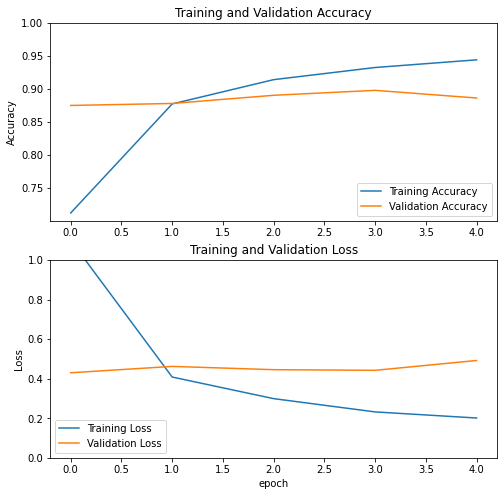

In [ ]:
history = model.fit(train_ds,
                    epochs=EPOCHS,
                    validation_data=val_ds)
model.save('/content/drive/MyDrive/hesam/resnet_model.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

plt.legend(loc='lower left')
plt.ylabel('Loss')
plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
from tensorflow import keras
import numpy as np

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/hesam/vgg_model.h5')

In [ ]:
testDatadir = '/content/drive/MyDrive/hesam/Data1/'
testData = tf.keras.preprocessing.image_dataset_from_directory(
    testDatadir, seed=123, image_size=images_size, batch_size=BATCH_SIZE)

Found 2118 files belonging to 10 classes.


In [ ]:
predictions = np.array([])
labels = np.array([])
for x, y in testData:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x),axis=1)])
  labels = np.concatenate([labels, np.array(y.numpy())])

In [ ]:
count = 0
for i in range(len(labels)):
    if labels[i] != predictions[i]:
        count += 1
print("errors:", count)

errors: 900
